<a href="https://colab.research.google.com/github/lmvu103/LSTM-Oil-Price-Prediction/blob/main/LSTM_Oil_Price_Predictions_RandomPlit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing necessary libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.metrics import mean_squared_error
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [12]:
#importing data from yahoo for 2017 to 2020
df = web.DataReader('BZ=F', data_source='yahoo', start='2001-01-01', end='2021-06-26')
df = df.reset_index()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2007-07-30,76.529999,75.440002,75.849998,75.739998,2575.0,75.739998
1,2007-07-31,77.169998,75.669998,75.699997,77.050003,3513.0,77.050003
2,2007-08-01,77.059998,74.860001,77.000000,75.349998,3930.0,75.349998
3,2007-08-02,76.209999,74.269997,75.220001,75.760002,6180.0,75.760002
4,2007-08-03,76.000000,74.529999,75.389999,74.750000,4387.0,74.750000
...,...,...,...,...,...,...,...
3409,2021-06-21,74.949997,72.980003,73.330002,74.900002,38734.0,74.900002
3410,2021-06-22,75.290001,74.339996,74.809998,74.809998,39381.0,74.809998
3411,2021-06-23,76.000000,74.730003,74.760002,75.190002,32883.0,75.190002
3412,2021-06-24,75.769997,74.519997,75.370003,75.559998,26664.0,75.559998


In [16]:
#format date data to appropriate format
df['Date']=pd.to_datetime(df['Date'], format="%b %d, %Y") 
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2007-07-30,76.529999,75.440002,75.849998,75.739998,2575.0,75.739998
1,2007-07-31,77.169998,75.669998,75.699997,77.050003,3513.0,77.050003
2,2007-08-01,77.059998,74.860001,77.000000,75.349998,3930.0,75.349998
3,2007-08-02,76.209999,74.269997,75.220001,75.760002,6180.0,75.760002
4,2007-08-03,76.000000,74.529999,75.389999,74.750000,4387.0,74.750000


In [13]:
df.shape

(3414, 7)

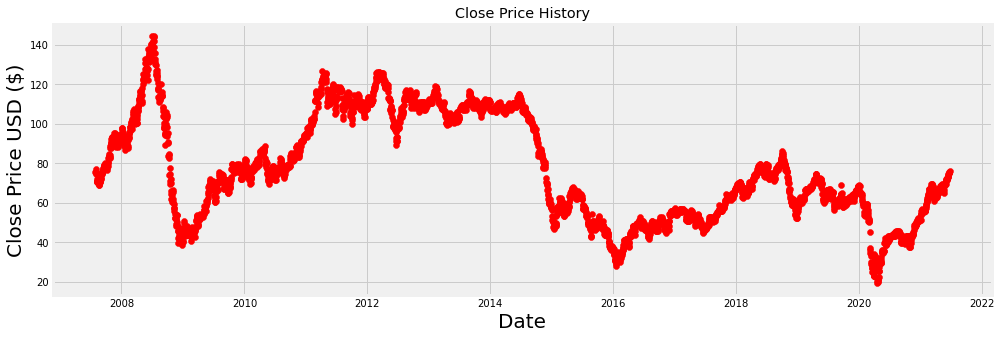

In [19]:
#Plotting the the graph
plt.figure(figsize=(15,5))
plt.title('Close Price History')
plt.scatter(df['Date'],df['Close'],c='Red')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.show()

In [20]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len

2732

In [21]:
#sale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.45070306],
       [0.46116971],
       [0.44758706],
       ...,
       [0.44630873],
       [0.4492649 ],
       [0.45421858]])

In [22]:
# split into train and test sets
train_size = int(len(scaled_data) * 0.70)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

In [23]:
# convert an array of values into a data_set matrix def
def create_data_set(_data_set, _look_back=1):
    data_x, data_y = [], []
    for i in range(len(_data_set) - _look_back - 1):
        a = _data_set[i:(i + _look_back), 0]
        data_x.append(a)
        data_y.append(_data_set[i + _look_back, 0])
    return np.array(data_x), np.array(data_y)

In [24]:
# reshape into X=t and Y=t+1
look_back =90
X_train,Y_train,X_test,Ytest = [],[],[],[]
X_train,Y_train=create_data_set(train,look_back)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test,Y_test=create_data_set(test,look_back)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [25]:
# create and fit the LSTM network regressor = Sequential() 
regressor = Sequential()

regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.1))

regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.1))

regressor.add(Dense(units = 1))


regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
reduce_lr = ReduceLROnPlateau(monitor='val_loss',patience=5)
history =regressor.fit(X_train, Y_train, epochs = 20, batch_size = 15,validation_data=(X_test, Y_test), callbacks=[reduce_lr],shuffle=False)

Epoch 1/20
154/154 [==============================] - 42s 135ms/step - loss: 0.0373 - val_loss: 0.0100
Epoch 2/20
154/154 [==============================] - 19s 123ms/step - loss: 0.0346 - val_loss: 0.0225
Epoch 3/20
154/154 [==============================] - 19s 123ms/step - loss: 0.0635 - val_loss: 0.0198
Epoch 4/20
154/154 [==============================] - 19s 123ms/step - loss: 0.0538 - val_loss: 0.0105
Epoch 5/20
154/154 [==============================] - 19s 124ms/step - loss: 0.0321 - val_loss: 0.0020
Epoch 6/20
154/154 [==============================] - 19s 123ms/step - loss: 0.0105 - val_loss: 8.3836e-04
Epoch 7/20
154/154 [==============================] - 19s 124ms/step - loss: 0.0055 - val_loss: 0.0012
Epoch 8/20
154/154 [==============================] - 19s 124ms/step - loss: 0.0069 - val_loss: 6.4862e-04
Epoch 9/20
154/154 [==============================] - 19s 124ms/step - loss: 0.0047 - val_loss: 0.0011
Epoch 10/20
154/154 [==============================] - 19s 125ms/

In [26]:
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])

Train Mean Absolute Error: 2.7676871476534477
Train Root Mean Squared Error: 3.5561004954208113
Test Mean Absolute Error: 1.6927817893998272
Test Root Mean Squared Error: 2.3757989199770857


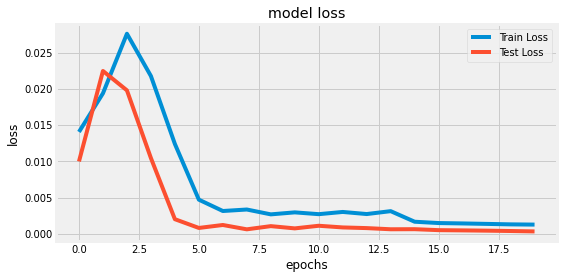

In [27]:
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

In [28]:
#creatinf testing dataset
test_data = scaled_data[training_data_len - 60: , :]

#creating x_test and y_tets datasets
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i -60:i, 0])

#converting data to numpy array
x_test = np.array(x_test)

#reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

#get predicted price values
predictions = regressor.predict(x_test)
predictions = scaler.inverse_transform(predictions)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


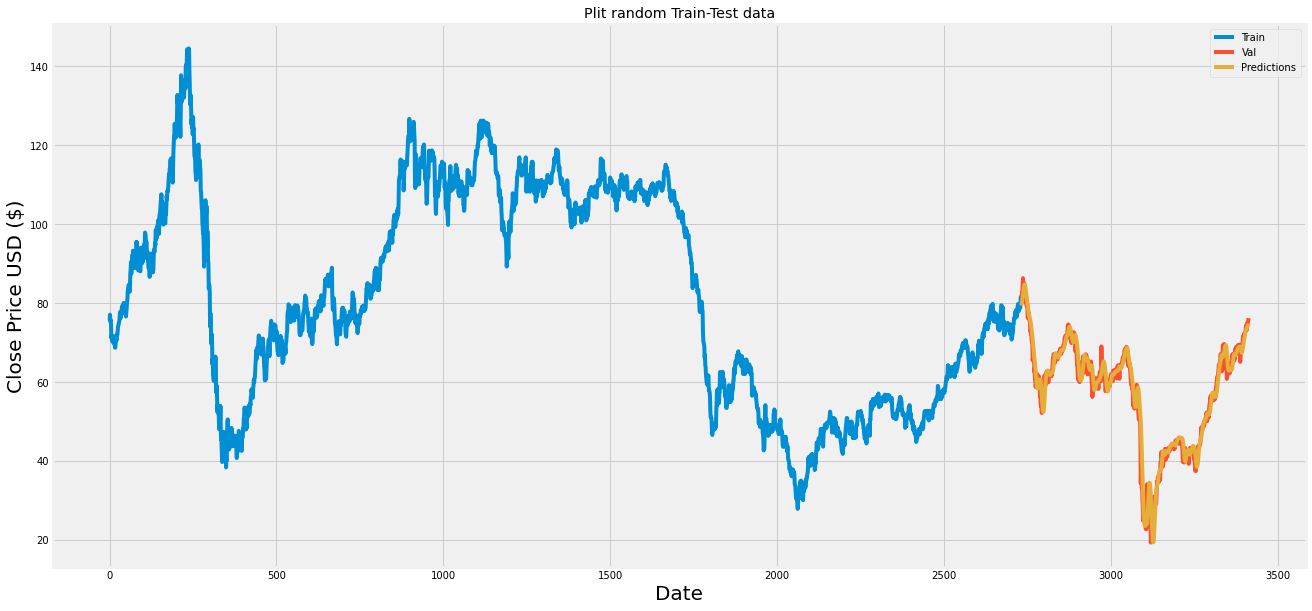

In [44]:
#plot the data

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualization
plt.figure(figsize=(20,10))
plt.title('Plit random Train-Test data')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'], loc='upper right')
plt.show()

In [30]:
#valid and predicted prices
valid

,Close,Predictions
2732,81.339996,79.355446
2733,81.720001,79.841187
2734,82.720001,80.352867
2735,82.669998,80.902908
2736,84.800003,81.439880
...,...,...
3409,74.900002,73.908958
3410,74.809998,74.084938
3411,75.190002,74.291451
3412,75.559998,74.533325


In [42]:
dataset_test = data[-60:].values

inputs = dataset_test
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

i = 0
while i < 60:
    X_test = []
    no_of_sample = len(inputs)

    # Lay du lieu cuoi cung
    X_test.append(inputs[no_of_sample-60:no_of_sample, 0])
    X_test = np.array(X_test)
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    # Du doan gia
    predicted_stock_price = regressor.predict(X_test)

    # chuyen gia tu khoang (0,1) thanh gia that
    predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

    dataset_test = np.append(dataset_test, predicted_stock_price[0])
    inputs = dataset_test
    inputs = inputs.reshape(-1, 1)
    inputs = scaler.transform(inputs)
    print('Price next (' + str(i+1) + ') days of Oil Brent : ', predicted_stock_price[0][0])
    i = i + 1

Price next (1) days of Oil Brent :  75.138435
Price next (2) days of Oil Brent :  75.4061
Price next (3) days of Oil Brent :  75.597946
Price next (4) days of Oil Brent :  75.727066
Price next (5) days of Oil Brent :  75.812164
Price next (6) days of Oil Brent :  75.86865
Price next (7) days of Oil Brent :  75.906876
Price next (8) days of Oil Brent :  75.93295
Price next (9) days of Oil Brent :  75.950264
Price next (10) days of Oil Brent :  75.96068
Price next (11) days of Oil Brent :  75.965256
Price next (12) days of Oil Brent :  75.96471
Price next (13) days of Oil Brent :  75.9596
Price next (14) days of Oil Brent :  75.950485
Price next (15) days of Oil Brent :  75.937874
Price next (16) days of Oil Brent :  75.92221
Price next (17) days of Oil Brent :  75.90394
Price next (18) days of Oil Brent :  75.88344
Price next (19) days of Oil Brent :  75.86104
Price next (20) days of Oil Brent :  75.83706
Price next (21) days of Oil Brent :  75.81175
Price next (22) days of Oil Brent : 

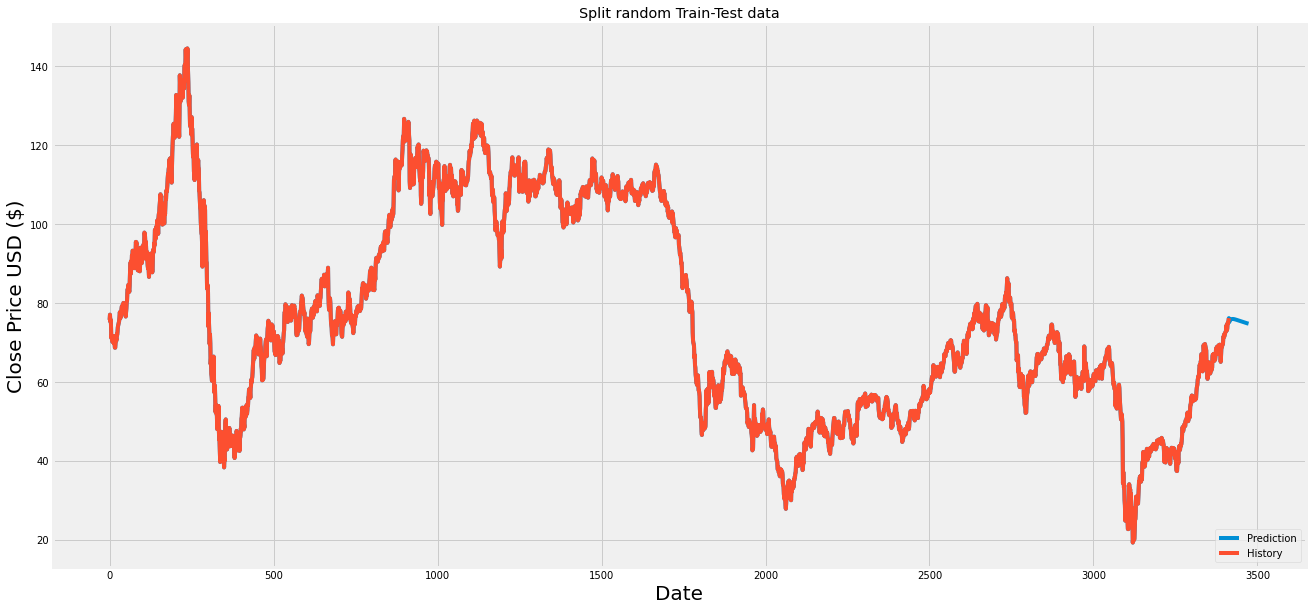

In [46]:
dataset_pre = np.append(data, dataset_test[60:])

#visualization
plt.figure(figsize=(20,10))
plt.title('Split random Train-Test data')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Close Price USD ($)', fontsize=20)
plt.plot(dataset_pre)
plt.plot(data)
plt.legend(['Prediction', 'History'], loc='lower right')
plt.show()

In [ ]:
#getting the closing price for last 60 days and converting dataframe into array
last_60_days = data[-60:].values

#scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#create empty list
X_test = []

#append last 60 days 
X_test.append(last_60_days_scaled)

#converting X_test dataset to numpy array
X_test = np.array(X_test)

#reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#get teh predicted scaled prices
pred_price = regressor.predict(X_test)

#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[75.49053]]
